In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from requests import get
# from io import BytesIO

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

In [3]:
# x = pd.read_csv(BytesIO(get('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv').content), index_col=0)['0']
# y = pd.read_csv(BytesIO(get('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv').content), index_col=0)['0']

In [4]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

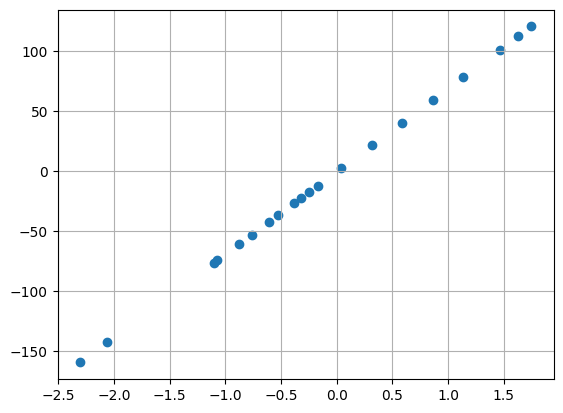

In [5]:
plt.figure()
plt.scatter(x, y)
plt.grid(True)
plt.show()

In [6]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [7]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153397


In [8]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.745680891855


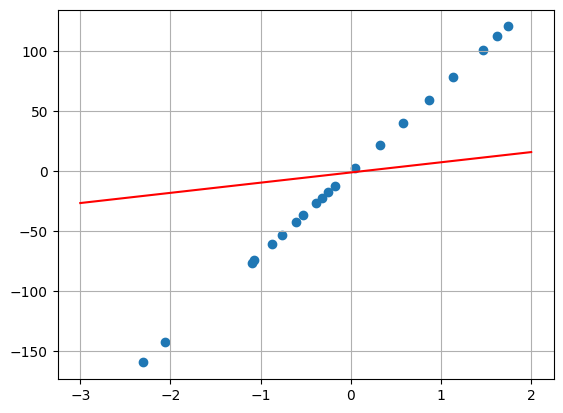

In [9]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.grid(True)
plt.show()

In [10]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [11]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.03937321303112905


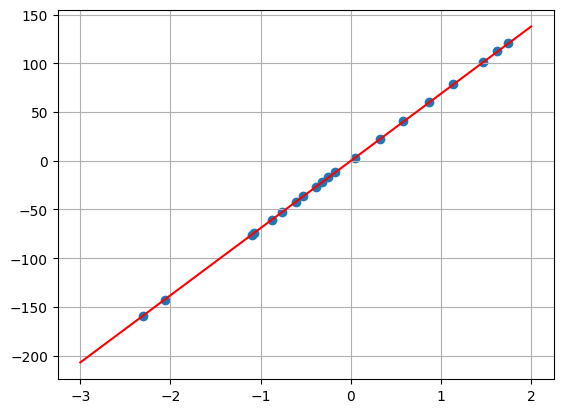

In [12]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.grid(True)
plt.show()

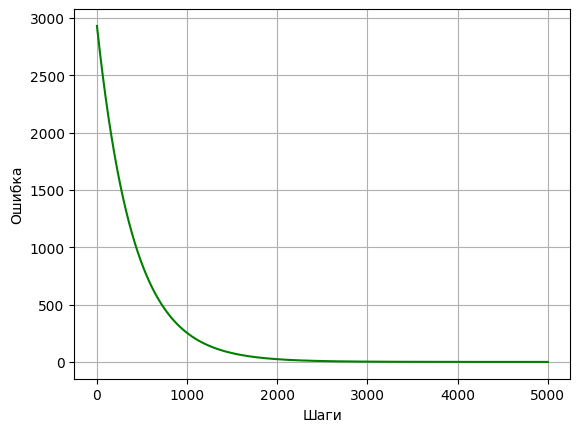

In [13]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Шаги')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

#### 1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [14]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha=0.01, max_steps=100)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 249.7663249484121


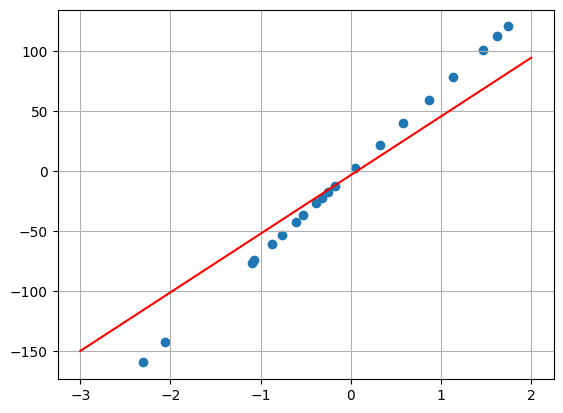

In [15]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.grid(True)
plt.show()

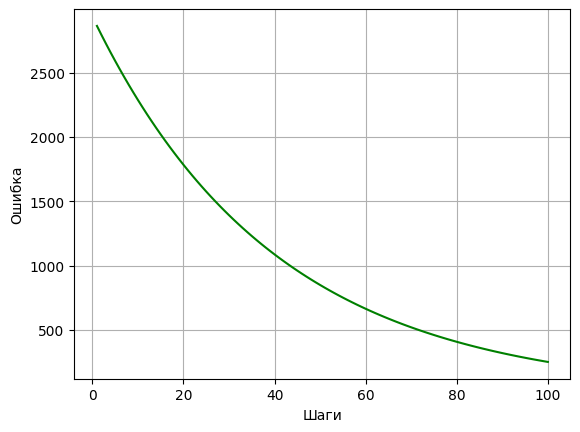

In [16]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Шаги')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

In [17]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha=0.9, max_steps=10000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 3.0967720910582346e-29


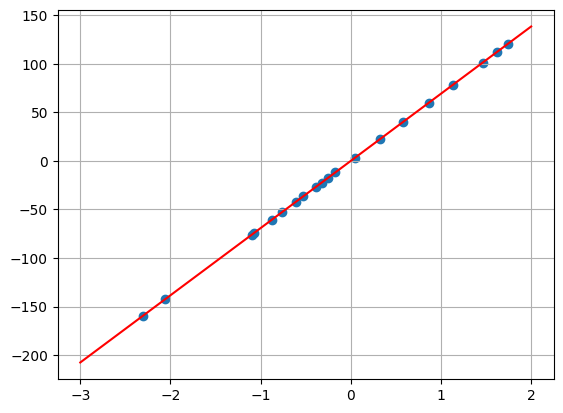

In [18]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.grid(True)
plt.show()

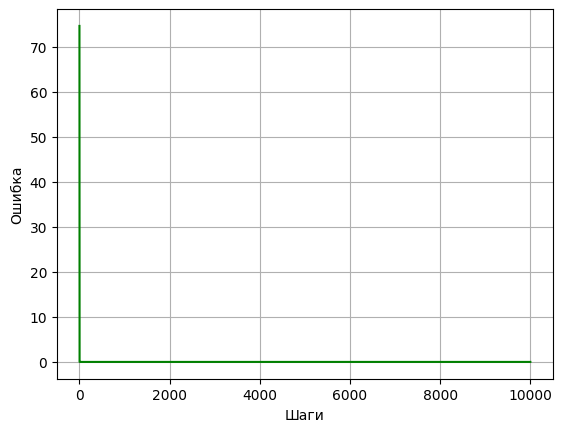

In [19]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Шаги')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

In [20]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha=0.001, max_steps=50000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.0836350407000583e-23


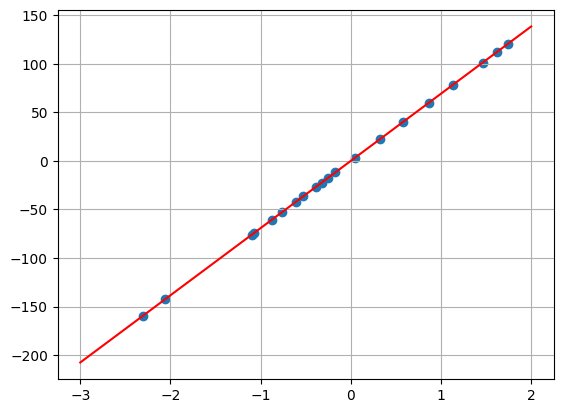

In [21]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.grid(True)
plt.show()

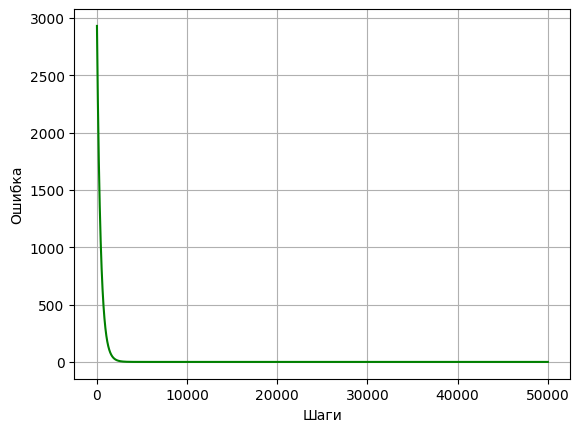

In [22]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Шаги')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

#### 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

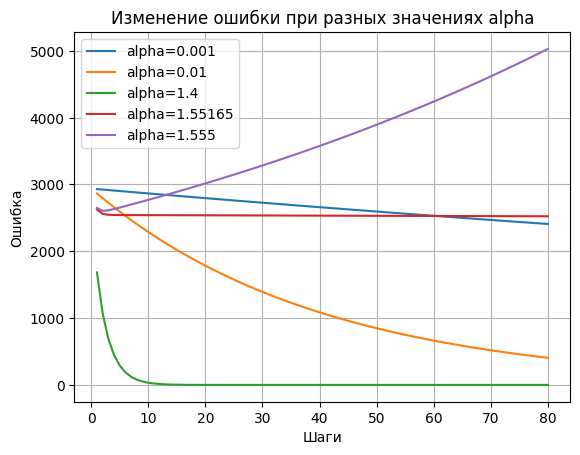

In [23]:
alphas = [0.001, 0.01, 1.4, 1.55165,  1.555]
for alpha in alphas:
    hyp = Model()
    steps, errors = hyp.fit(x, y, alpha=alpha, max_steps=80)

    plt.plot(steps, errors, label=f'alpha={alpha}')

plt.xlabel('Шаги')
plt.ylabel('Ошибка')
plt.title('Изменение ошибки при разных значениях alpha')
plt.grid(True)
plt.legend()
plt.show()


### 3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [24]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y=None):
        if isinstance(X, pd.DataFrame):
            Y = X['y']
            X = X['x']
        
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y=None, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.DataFrame):
            Y = X['y']
            X = X['x']
            
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [25]:
hyp = Model()
steps, errors = hyp.fit(pd.DataFrame({'x': x, 'y': y}))
J = hyp.error(pd.DataFrame({'x': x, 'y': y}))
print("error after gradient descent:", J)

error after gradient descent: 0.03937321303112905


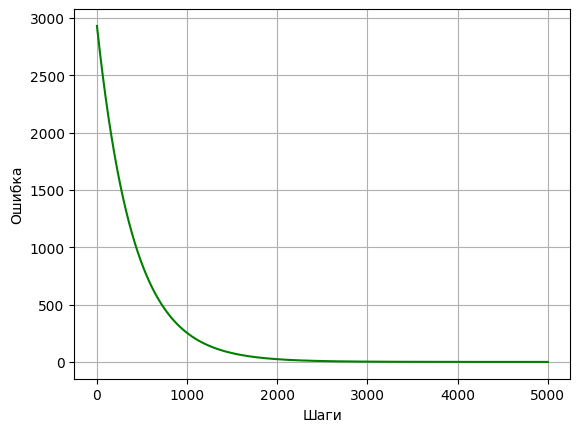

In [26]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Шаги')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

#### 4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [27]:
def fit_tmp(self, X, Y=None, alpha=0.001, accuracy=0.01, max_steps=5000, error_to_stop=0.000001):
    if isinstance(X, pd.DataFrame):
        Y = X['y']
        X = X['x']
        
    steps, errors = [], []
    step = 0
    for _ in range(max_steps):
        dJ0 = sum(self.predict(X) - Y) / len(X)
        dJ1 = sum((self.predict(X) - Y) * X) / len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
        new_err = hyp.error(X, Y)
        step += 1
        steps.append(step)
        errors.append(new_err)
        
        if len(errors) >= 2 and error_to_stop > abs(errors[-2] - errors[-1]):
            break
        
    return steps, errors

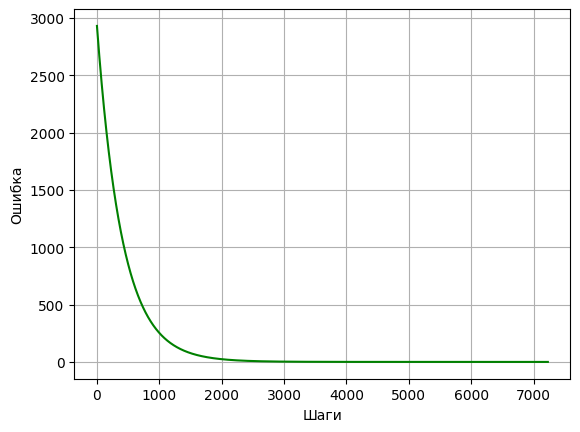

In [28]:
Model.fit = fit_tmp
hyp = Model()
steps, errors = hyp.fit(pd.DataFrame({'x': x, 'y': y}), max_steps=500000)
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Шаги')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

#### 5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

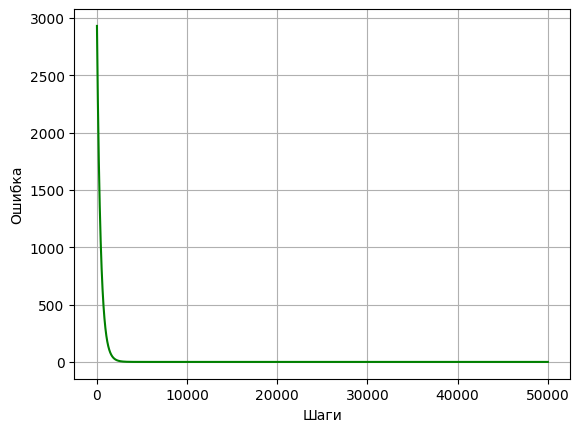

In [29]:
Model.fit = fit_tmp
hyp = Model()
steps, errors = hyp.fit(pd.DataFrame({'x': x, 'y': y}), max_steps=50000, error_to_stop=10**(-500))
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Шаги')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

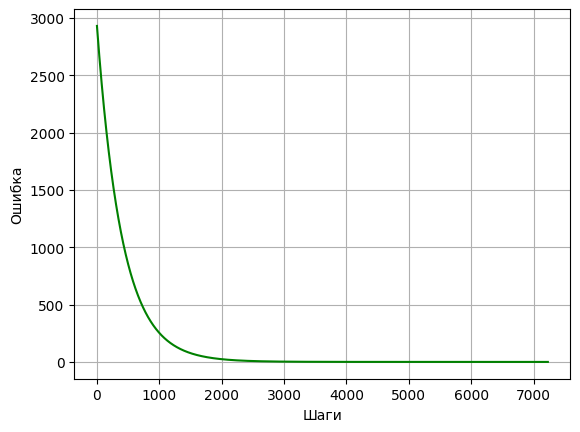

In [30]:
Model.fit = fit_tmp
hyp = Model()
steps, errors = hyp.fit(pd.DataFrame({'x': x, 'y': y}), max_steps=50000, error_to_stop=10**(-6))
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Шаги')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

#### 6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [31]:
def fit_tmp2(self, X, Y=None, alpha=0.95, accuracy=0.01, max_steps=5000, error_to_stop=0.000001):
    if isinstance(X, pd.DataFrame):
        Y = X['y']
        X = X['x']
        
    steps, errors = [], []
    step = 0
    prev_error = 10*1000
    
    while step < max_steps:
        dJ0 = sum(self.predict(X) - Y) / len(X)
        dJ1 = sum((self.predict(X) - Y) * X) / len(X)
        
        b0_orig, b1_orig = self.b0, self.b1
        
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
        
        new_err = hyp.error(X, Y)
        step += 1
        steps.append(step)
        errors.append(new_err)
        
        if new_err > prev_error:
            alpha /= 2
            self.b0, self.b1 = b0_orig, b1_orig
        else:
            prev_error = new_err
        
        if len(errors) >= 2 and error_to_stop > abs(errors[-2] - errors[-1]):
            break
        
    return steps, errors

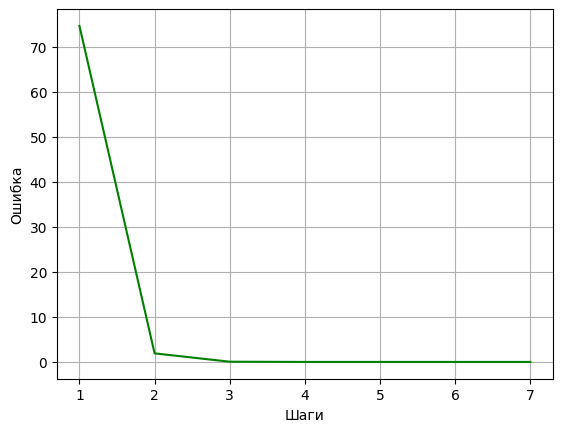

In [32]:
Model.fit = fit_tmp2
hyp = Model()
steps, errors = hyp.fit(pd.DataFrame({'x': x, 'y': y}), alpha=0.9, max_steps=220)
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Шаги')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

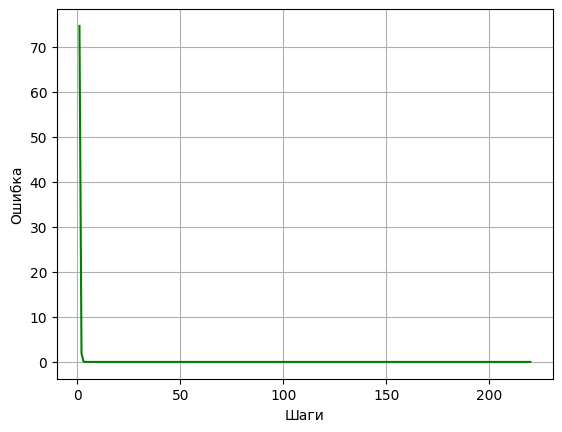

In [33]:
Model.fit = fit_tmp2
hyp = Model()
steps, errors = hyp.fit(pd.DataFrame({'x': x, 'y': y}), alpha=0.9, max_steps=220, error_to_stop=0)
plt.figure()
plt.plot(steps, errors, 'g')
plt.xlabel('Шаги')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [34]:
def plot(self, X, Y):
        if isinstance(X, pd.DataFrame):
            Y = X['y']
            X = X['x']
        
        plt.scatter(X, Y, label='Данные')
        
        y_pred = self.predict(X)
        plt.plot(X, y_pred, color='red', label='Линия регрессии')
        
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.legend()
        plt.show()

Model.plot = plot

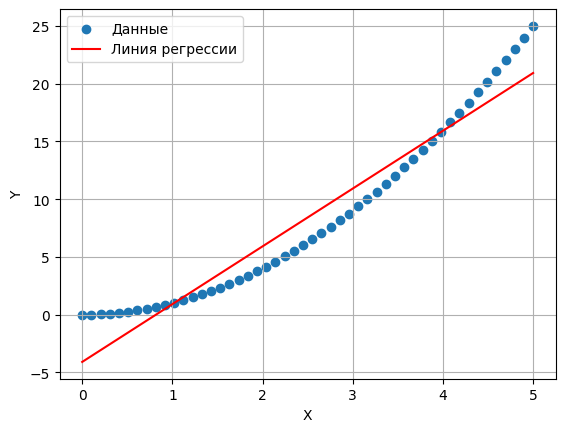

In [35]:
x = np.linspace(0, 5)
y = x**2
hyp.fit(x, y)
hyp.plot(x, y)